In [1]:
# Import Packaes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# import warnings
# warnings.filterwarnings("ignore")

# Prevents Pandas Copy Warning
pd.set_option("mode.copy_on_write", True)

## Exploratory Data Analysis

In [2]:
# Load in the data
credit_card_data = pd.read_csv("data/creditcard.csv.zip")

# Inspect the data
display(credit_card_data.sample(10))

print(f"Credit card dataset dimensions: {credit_card_data.shape}")

# Information about each variable
print("")

display(credit_card_data.info())

# Check for missing values
display(credit_card_data.isna().sum())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6195,7214.0,1.291482,-0.616344,0.709075,-0.196007,-1.116738,-0.505150,-0.760386,-0.076040,0.973380,...,-0.123068,-0.077749,0.044165,0.350876,0.375166,-0.272369,-0.006631,0.007987,29.70,0
224660,143903.0,1.980328,0.104427,-0.923277,1.353652,0.047918,-0.223057,-0.382536,0.034461,0.965143,...,-0.283405,-0.677841,0.263567,-0.961968,-0.298113,-0.888231,0.073120,-0.005631,7.90,0
39713,39934.0,-0.288940,0.120441,0.515367,-1.172504,0.031666,-0.337154,0.453491,-0.103607,-1.748295,...,-0.030085,-0.280703,0.062188,-0.566004,-0.414694,-0.424620,0.021707,0.120923,54.89,0
255888,157449.0,1.891885,0.313125,0.064054,3.594392,0.189203,0.868100,-0.472064,0.117760,-0.449722,...,-0.099508,-0.217298,0.218339,-1.035631,-0.363186,-0.209868,0.027200,-0.025988,25.12,0
67504,52565.0,1.197128,0.229823,0.426430,1.449550,-0.352896,-0.656559,0.146280,-0.149934,0.312527,...,-0.127585,-0.183217,-0.096155,0.385060,0.730164,-0.341812,0.021644,0.019998,13.99,0
59011,48649.0,1.202866,0.193065,0.616077,0.554697,-0.537045,-0.789108,-0.047939,-0.062165,-0.203492,...,-0.194217,-0.607921,0.151292,0.525803,0.154452,0.065022,-0.033693,0.010556,1.79,0
61192,49703.0,1.283065,0.319935,0.148491,0.612021,-0.229859,-0.876918,0.051889,-0.158796,0.115300,...,-0.316197,-0.927065,0.090297,-0.025474,0.251437,0.118092,-0.025881,0.026197,0.89,0
205860,135943.0,0.368735,0.749895,-0.710556,-0.373901,1.008171,0.157424,0.240232,-0.785432,-0.058128,...,0.766678,-0.066739,-0.341470,0.166806,0.855703,0.659807,0.158185,0.270915,9.99,0
41523,40719.0,1.058605,-0.578154,1.084367,0.049894,-0.827569,0.872234,-0.933233,0.507671,1.018488,...,-0.125390,-0.119034,0.124776,-0.214339,-0.063831,0.984587,-0.010073,-0.001713,20.00,0
123162,76833.0,-1.532089,0.710368,1.957097,-0.335231,-0.353129,-0.547326,0.045195,0.662630,-0.369720,...,-0.226794,-0.801606,-0.059842,0.528031,0.224464,0.098129,0.117987,-0.002914,20.00,0


Credit card dataset dimensions: (284807, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V2

None

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

After loading in the dataset we observe the following:

- There are 284,807 observation and 31 variables.
- All variables are floats types except for `Class` which is an integer
- There are no missing values

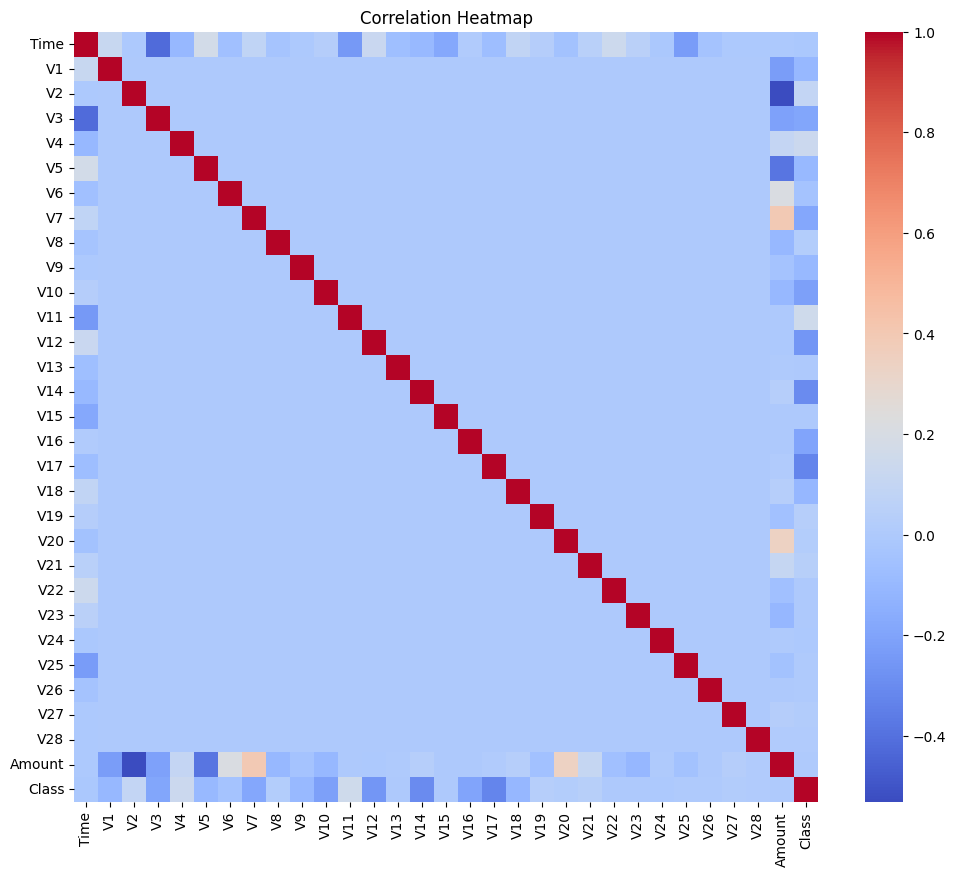

In [3]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(credit_card_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()